<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_Luana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# These are the library we are going to use
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

In [0]:
# Notas finais
# Reading the data directly from the Git
notas_url = ["https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2017.1.csv",
            "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2017.2.csv",
            #"https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2018.1.csv",
            #"https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2018.2.csv"
            ]

In [0]:
# Notas since 2017.1 until 2018.2
notas2017_1 = pd.read_csv(notas_url[0], sep=';', encoding = "ISO-8859-1" )
notas2017_2 = pd.read_csv(notas_url[1], sep=';', encoding = "ISO-8859-1" )
#notas2018_1 = pd.read_csv(notas_url[2], sep=';', encoding = "ISO-8859-1" )
#notas2018_2 = pd.read_csv(notas_url[3], sep=';', encoding = "ISO-8859-1" )

In [0]:
# Setting priginal data into one vector due to easier manipulation
classes =[notas2017_1, notas2017_2,#notas2018_1, notas2018_2
         ]

In [0]:
# Adding year in each dataframe 
year = 2017 # The year we decide to start our study
for i in range(2):
  classes[i]['ano'] = year
  if i%2!=0:
    year += 1
  
# Renaming the column for better manipulation
  classes[i].rename(columns={'nome': 'disciplina'}, inplace=True)
  

In [6]:
for i in range(2):
  # Changing some columns types in this step
  classes[i].periodo   = classes[i].periodo.astype(str)
  classes[i].codigo    = classes[i].codigo.astype(str)
  classes[i].disciplina= classes[i].disciplina.astype(str)
  classes[i].turma     = classes[i].turma.astype(str)
  classes[i].siape     = classes[i].siape.astype(str)
  classes[i].horario   = classes[i].horario.astype(str)
  classes[i].matricula = classes[i].matricula.astype(int)
 #classes[i].nota      = classes[i].nota.astype(float) #Não pode converter pq os alunos indeferidos no campo nota tem o simbolo -
  classes[i].situacao  = classes[i].situacao.astype(str)
  classes[i].ano       = classes[i].ano.astype(str)

# Filtro para os dados apenas da disciplina do codigo que tu selecionou
  classes[i] = classes[i][classes[i]['situacao'] !='EXCLUIDA']
  
  #Concatenar as colunas ano e periodo
  classes[i].ano = classes[i]['ano'] + "." + classes[i]['periodo']
  # transformar a tipo da coluna ano 
  classes[i].ano       = classes[i].ano.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
#gerar os arquivos com as notas de cada disciplina
cod_dis = ["ECT2101","ECT2102", "ECT2103","ECT2104", "ECT2105","ECT2106"]

for cod in cod_dis :
  csv20171 = classes[0][classes[0]['codigo']==cod]
  csv20171.to_csv(r'20171'+cod+'.csv')

csv20172 = classes[1][classes[1]['codigo']=="ECT2203"]
csv20172.to_csv(r'20172ECT2203.csv')

#merge_classesCopy = merge_classes[merge_classes['codigo']=="ECT2106"]
#merge_classesCopy = merge_classesCopy[["matricula","disciplina","nota","ano","situacao"]]
#criar o arquivo csv por disciplina.. aqui tu tem q ficar mudando o nome do arquivo
#merge_classesCopy.to_csv(r'ECT2106.csv')

#Agora tu volta para a celula que tem q colocar o novo codigo da outra disciplina e roda de novo... lembra de ler tudo de novo .. desdo inicio



In [0]:
# aqui tu vai colocar o nome de todos os aquivos que tu gerou
notas_url = ["20171ECT2101.csv","20171ECT2102.csv", "20171ECT2103.csv","20171ECT2104.csv", "20171ECT2105.csv","20171ECT2106.csv","20172ECT2203.csv"]

In [0]:
# Notas since 2017.1 until 2017.2
notas_1 = pd.read_csv(notas_url[0])
notas_2 = pd.read_csv(notas_url[1] )
notas_3 = pd.read_csv(notas_url[2] )
notas_4 = pd.read_csv(notas_url[3] )
notas_5 = pd.read_csv(notas_url[4] )
notas_6 = pd.read_csv(notas_url[5] )
notas_7 = pd.read_csv(notas_url[6] )
# aqui tu vai adicionar uma variavel para cada arquivo que tu cirar

# Setting priginal data into one vector due to easier manipulation, aqui tu vai adicionar todas a variaveis
notas =[notas_1, notas_2,notas_3, notas_4,notas_5, notas_6,notas_7]

In [10]:
# Concatenating all notas
merge_notas = notas[0]
for i in range(1,7):
  merge_notas = pd.concat([merge_notas, notas[i]], ignore_index=True)
merge_notas

,Unnamed: 0,periodo,codigo,disciplina,turma,siape,horario,matricula,nota,situacao,ano
0,24,1,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356M34 (13/02/2017 - 24/04/2017),20170000744,-,DESISTENCIA,2017.1
1,30,1,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (13/02/2017 - 24/04/2017),20170000824,-,CANCELADO,2017.1
2,42,1,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356M34 (13/02/2017 - 24/04/2017),20170000996,-,DESISTENCIA,2017.1
3,60,1,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (13/02/2017 - 24/04/2017),20170001410,-,DESISTENCIA,2017.1
4,66,1,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356M34 (13/02/2017 - 24/04/2017),20170001456,2.40,REPROVADO,2017.1
5,72,1,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356M34 (13/02/2017 - 24/04/2017),20170001536,5.90,APROVADO POR NOTA,2017.1
6,84,1,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356M34 (13/02/2017 - 24/04/2017),20170001812,-,TRANCADO,2017.1
7,90,1,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356M34 (13/02/2017 - 24/04/2017),20170002014,-,CANCELADO,2017.1
8,120,1,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (13/02/2017 - 24/04/2017),20170002490,-,DESISTENCIA,2017.1
9,138,1,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (13/02/2017 - 24/04/2017),20170002650,5.00,APROVADO POR NOTA,2017.1


In [11]:
disciplinas = merge_notas["disciplina"].unique()
colunas    = ["matricula"]
tabela= pd.DataFrame(columns=colunas)
for i in disciplinas:
  notasTurma = merge_notas.loc[merge_notas["disciplina"].str.contains(i, regex=False),["matricula","disciplina","ano","nota","situacao"]]
  notasTurma = notasTurma.sort_values("matricula")
  tabela = pd.merge(notasTurma,tabela,on=['matricula'], how="outer") 


tabela.columns = ['matricula', disciplinas[6],disciplinas[6]+"ano",disciplinas[6]+"nota",disciplinas[6]+"situacao",
                 disciplinas[5],disciplinas[5]+"ano",disciplinas[5]+"nota",disciplinas[5]+"situacao", 
                 disciplinas[4],disciplinas[4]+"ano",disciplinas[4]+"nota",disciplinas[4]+"situacao",
                 disciplinas[3],disciplinas[3]+"ano",disciplinas[3]+"nota",disciplinas[3]+"situacao",
                 disciplinas[2],disciplinas[2]+"ano",disciplinas[2]+"nota",disciplinas[2]+"situacao",
                 disciplinas[1],disciplinas[1]+"ano",disciplinas[1]+"nota",disciplinas[1]+"situacao",
                 disciplinas[0],disciplinas[0]+"ano",disciplinas[0]+"nota",disciplinas[0]+"situacao"]


tabela = tabela.drop_duplicates()
tabela = tabela.sort_values('matricula')
tabela
  

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
1957,2011005958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QUÍMICA GERAL,2017.1,-,TRANCADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2810,2011006866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.30,REPROVADO POR MÉDIA E POR FALTAS,NaN,NaN,NaN,NaN
2811,2011900191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,5.10,APROVADO POR NOTA,NaN,NaN,NaN,NaN
2812,2012037965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.00,REPROVADO POR MÉDIA E POR FALTAS,NaN,NaN,NaN,NaN
2813,2012921973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,-,CANCELADO,PRÉ-CÁLCULO,2017.1,-,CANCELADO
2516,2012922980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CÁLCULO I,2017.1,-,CANCELADO,NaN,NaN,NaN,NaN,PRÉ-CÁLCULO,2017.1,-,CANCELADO
2814,2012923412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.10,CANCELADO,NaN,NaN,NaN,NaN
0,2012924590,LÓGICA DE PROGRAMAÇÃO,2017.2,-,CANCELADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,-,INDEFERIDO,NaN,NaN,NaN,NaN
2517,2012924634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CÁLCULO I,2017.1,0.00,REPROVADO POR MÉDIA E POR FALTAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2815,2012924939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.1,6.80,APROVADO POR NOTA,NaN,NaN,NaN,NaN


In [0]:
#Tabela só com os registros de quem cursou as cinco disciplinas em 2017.1 e também cursou LOP em 2017.2
tabela1 = tabela.dropna(subset=["LÓGICA DE PROGRAMAÇÃO"])
tabela1 = tabela1.sort_values('matricula')


In [13]:
#Em 2017.2 tivemos 806 ocorrências da disciplina de LOP
tabela1.info()

#em 2017.2 tivemos 574 alunos que fizeram a disciplina de LOP
tabela1.matricula.unique().shape
# Esses números tem essa diferença pois o aluno pode esta com status diferente para uma das 6 disicplinas que estão sendo análisadas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 1007
Data columns (total 29 columns):
matricula                                  806 non-null int64
LÓGICA DE PROGRAMAÇÃO                      806 non-null object
LÓGICA DE PROGRAMAÇÃOano                   806 non-null float64
LÓGICA DE PROGRAMAÇÃOnota                  806 non-null object
LÓGICA DE PROGRAMAÇÃOsituacao              806 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADE            406 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEano         406 non-null float64
CIÊNCIA, TECNOLOGIA E SOCIEDADEnota        406 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao    406 non-null object
PRÁTICAS DE LEITURA E ESCRITA I            374 non-null object
PRÁTICAS DE LEITURA E ESCRITA Iano         374 non-null float64
PRÁTICAS DE LEITURA E ESCRITA Inota        374 non-null object
PRÁTICAS DE LEITURA E ESCRITA Isituacao    374 non-null object
QUÍMICA GERAL                              521 non-null object
QUÍMICA GE

(574,)

In [0]:
#verificar quais os alunos estão com o status de cancelado

#Em 2017.2 132 alunos cancelaram a disciplina de LOP
#tabela1[tabela1["LÓGICA DE PROGRAMAÇÃOsituacao"] == "CANCELADO"].shape

#Em 2017.1 6 alunos cancelaram a disciplina de CIÊNCIA, TECNOLOGIA E SOCIEDADE e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao"] == "CANCELADO"].shape

#Em 2017.1  2 alunos cancelarm a disciplina de PRÁTICAS DE LEITURA E ESCRITA I e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "CANCELADO"].shape

#Em 2017.1 16 alunos cancelaram a disciplina de  Química Geral e tentaram fazer a matriucla em LOP em 2017.2 
#tabela1[tabela1["QUÍMICA GERALsituacao"] == "CANCELADO"].shape

#Em 2017.1 30 alunos cancelaram a discipina de CÁLCULO I e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["CÁLCULO Isituacao"] == "CANCELADO"].shape

#Em 2017.1 42 alunos cancelaram a discipina de VETORES E GEOMETRIA ANALÍTICA e tentaram fazer matricula em LOP em 2017.2
tabela1[tabela1["VETORES E GEOMETRIA ANALÍTICAsituacao"] == "CANCELADO"].shape



In [14]:
#tabela só com os alumos que cursaram, todas as disciplinas em 2017.1 e LOP em 2017.2
tabela2 = tabela1.dropna()


#Dos 806 registros apenas 316 fizeram todas as disciplinas em 2017.1 e cursaram LOP em 2017.2
tabela2.info()

#Dos 316 registros temos 259 alunos distintos, esse número é diferente pq tem aluno com status diferente em alguma das 6 disciplinas
tabela2.matricula.unique().shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 184 to 1001
Data columns (total 29 columns):
matricula                                  316 non-null int64
LÓGICA DE PROGRAMAÇÃO                      316 non-null object
LÓGICA DE PROGRAMAÇÃOano                   316 non-null float64
LÓGICA DE PROGRAMAÇÃOnota                  316 non-null object
LÓGICA DE PROGRAMAÇÃOsituacao              316 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADE            316 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEano         316 non-null float64
CIÊNCIA, TECNOLOGIA E SOCIEDADEnota        316 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao    316 non-null object
PRÁTICAS DE LEITURA E ESCRITA I            316 non-null object
PRÁTICAS DE LEITURA E ESCRITA Iano         316 non-null float64
PRÁTICAS DE LEITURA E ESCRITA Inota        316 non-null object
PRÁTICAS DE LEITURA E ESCRITA Isituacao    316 non-null object
QUÍMICA GERAL                              316 non-null object
QUÍMICA 

(259,)

In [0]:
tabela2["LÓGICA DE PROGRAMAÇÃOsituacao"].unique()

In [0]:
tabela2["CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao"].unique()

In [0]:
tabela2["QUÍMICA GERALsituacao"].unique()

In [0]:
tabela2["CÁLCULO Isituacao"].unique()

In [0]:
tabela2["VETORES E GEOMETRIA ANALÍTICAsituacao"].unique() 

In [0]:
tabela2["PRÉ-CÁLCULOsituacao"].unique()

In [15]:
#Alunos com status diferentes nas disciplinas

quantidade = tabela2.groupby("matricula").count()
lista_matricula = quantidade.loc[quantidade["LÓGICA DE PROGRAMAÇÃO"] != 1].index
lista_matricula

for mat in lista_matricula :
  tabela_remover = tabela2.loc[ (tabela2["matricula"] == mat) & ( (tabela2["LÓGICA DE PROGRAMAÇÃOsituacao"] == "INDEFERIDO") | (tabela2["LÓGICA DE PROGRAMAÇÃOsituacao"] == "DESISTENCIA")) ]
  tabela2 = tabela2.drop(tabela_remover.index)
  
quantidade1 = tabela2.groupby("matricula").count()
lista_matricula1 = quantidade1.loc[quantidade1["LÓGICA DE PROGRAMAÇÃO"] != 1].index
lista_matricula1  

Int64Index([2016097406, 20170034457, 20170038732], dtype='int64', name='matricula')

In [16]:
tabela_remover = tabela2.loc[ (tabela2["matricula"] == 2016097406) & (tabela2["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "INDEFERIDO") ]
tabela2 = tabela2.drop(tabela_remover.index)
tabela_remover = tabela2.loc[ (tabela2["matricula"] == 2016097406) &  ( (tabela2["QUÍMICA GERALsituacao"] == "INDEFERIDO") | (tabela2["QUÍMICA GERALsituacao"] == "DESISTENCIA"))]
tabela2 = tabela2.drop(tabela_remover.index)
tabela_remover = tabela2.loc[ (tabela2["matricula"] == 2016097406) &  (tabela2["VETORES E GEOMETRIA ANALÍTICAsituacao"] == "DESISTENCIA")]
tabela2 = tabela2.drop(tabela_remover.index)

tabela2[tabela2["matricula"] == 2016097406]

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
319,2016097406,LÓGICA DE PROGRAMAÇÃO,2017.2,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,1.30,REPROVADO POR MÉDIA E POR FALTAS,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,2.10,REPROVADO,QUÍMICA GERAL,2017.1,5.10,APROVADO POR NOTA,CÁLCULO I,2017.1,0.20,REPROVADO POR MÉDIA E POR FALTAS,VETORES E GEOMETRIA ANALÍTICA,2017.1,5.00,REPROVADO POR NOTA,PRÉ-CÁLCULO,2017.1,6.30,APROVADO POR NOTA


In [17]:
tabela_remover = tabela2.loc[ (tabela2["matricula"] == 20170034457) & (tabela2["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "DESISTENCIA") ]
tabela2 = tabela2.drop(tabela_remover.index)
tabela2[tabela2["matricula"] == 20170034457] 

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
776,20170034457,LÓGICA DE PROGRAMAÇÃO,2017.2,7.40,APROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,7.00,APROVADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,5.00,APROVADO POR NOTA,QUÍMICA GERAL,2017.1,7.20,APROVADO,CÁLCULO I,2017.1,2.80,REPROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,5.30,APROVADO POR NOTA,PRÉ-CÁLCULO,2017.1,5.00,APROVADO POR NOTA


In [18]:
tabela_remover = tabela2.loc[ (tabela2["matricula"] ==20170038732) & (tabela2["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "DESISTENCIA") ]
tabela2 = tabela2.drop(tabela_remover.index)
tabela2[tabela2["matricula"] == 20170038732]  

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
867,20170038732,LÓGICA DE PROGRAMAÇÃO,2017.2,3.90,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,8.20,APROVADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,7.60,APROVADO,QUÍMICA GERAL,2017.1,-,DESISTENCIA,CÁLCULO I,2017.1,8.50,APROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,7.60,APROVADO,PRÉ-CÁLCULO,2017.1,6.10,APROVADO POR NOTA


In [19]:
#temos 259 alunos com ocorrencias  nas cinco disciplinas em 2017.1 e tbm tem ocorrencia na disciplina de LOP em 2017.2
tabela2.matricula.unique().shape

(259,)

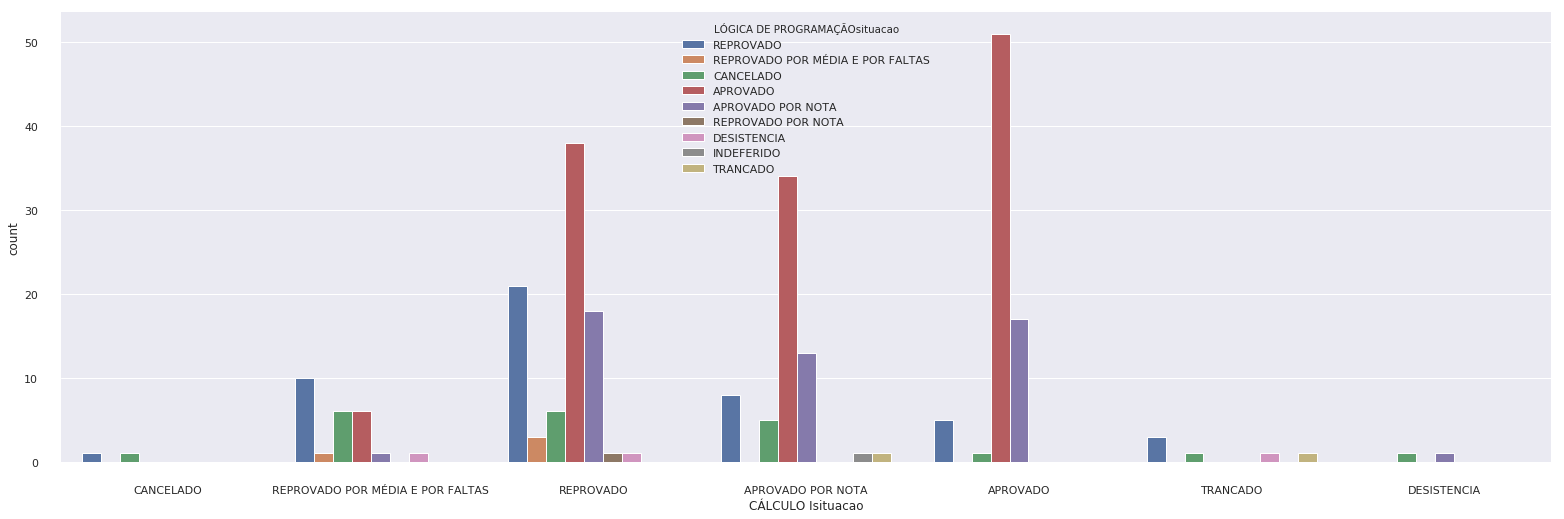

In [58]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('CÁLCULO Isituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

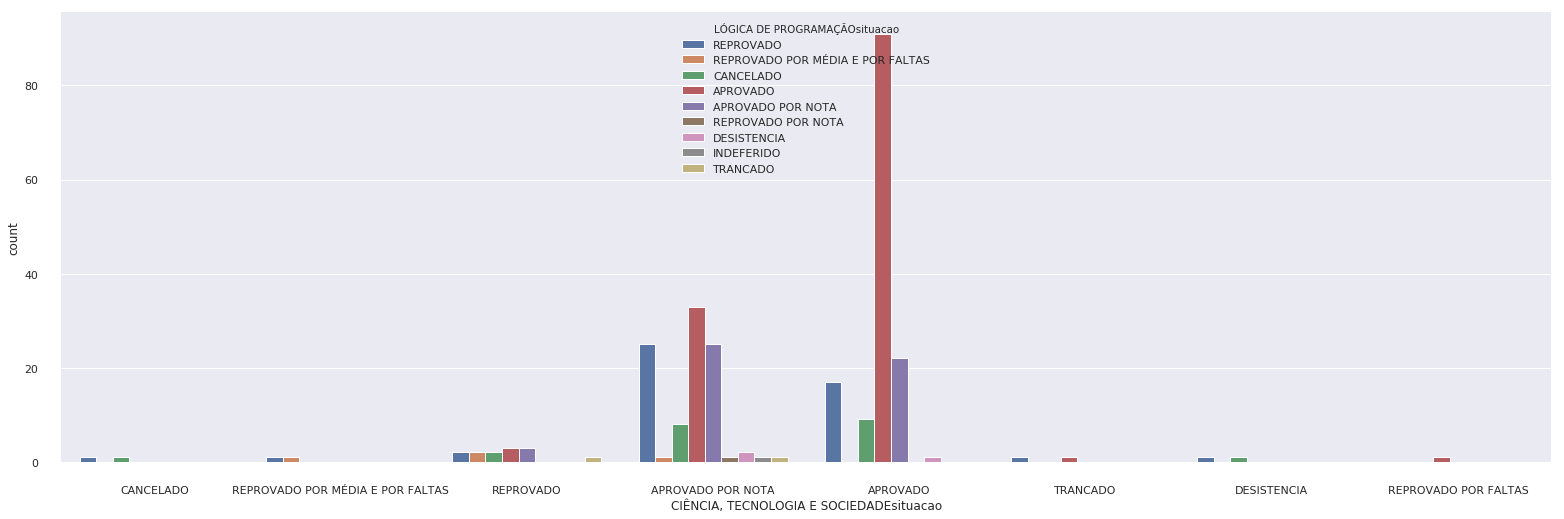

In [57]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

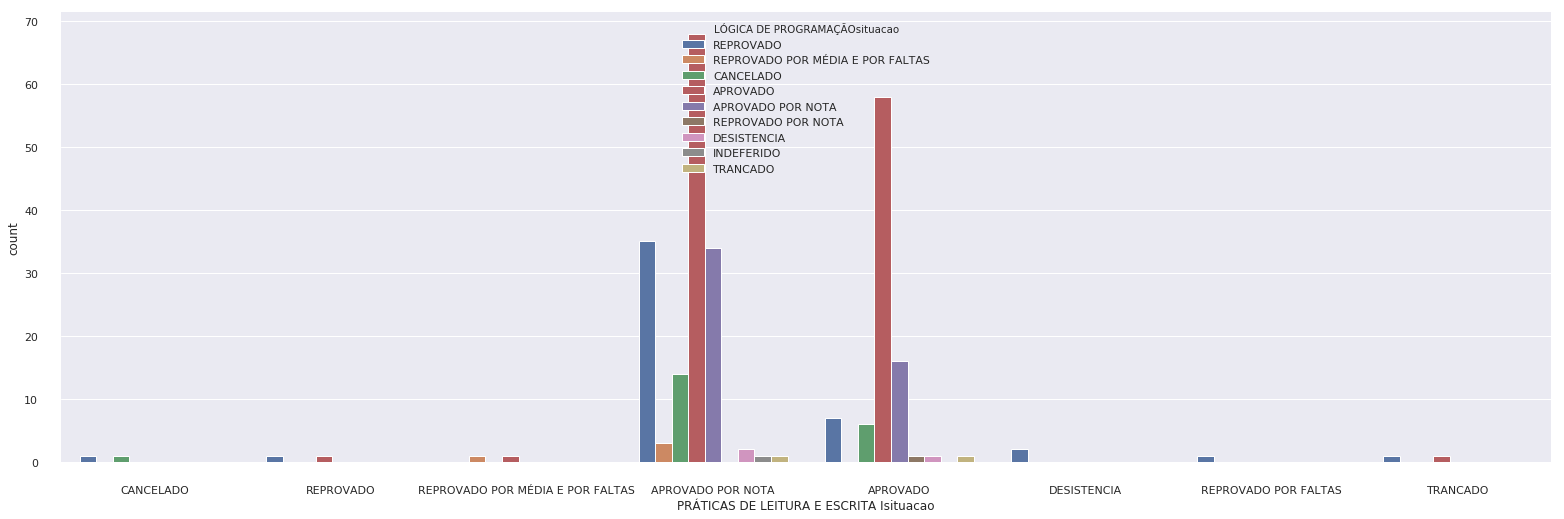

In [56]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('PRÁTICAS DE LEITURA E ESCRITA Isituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

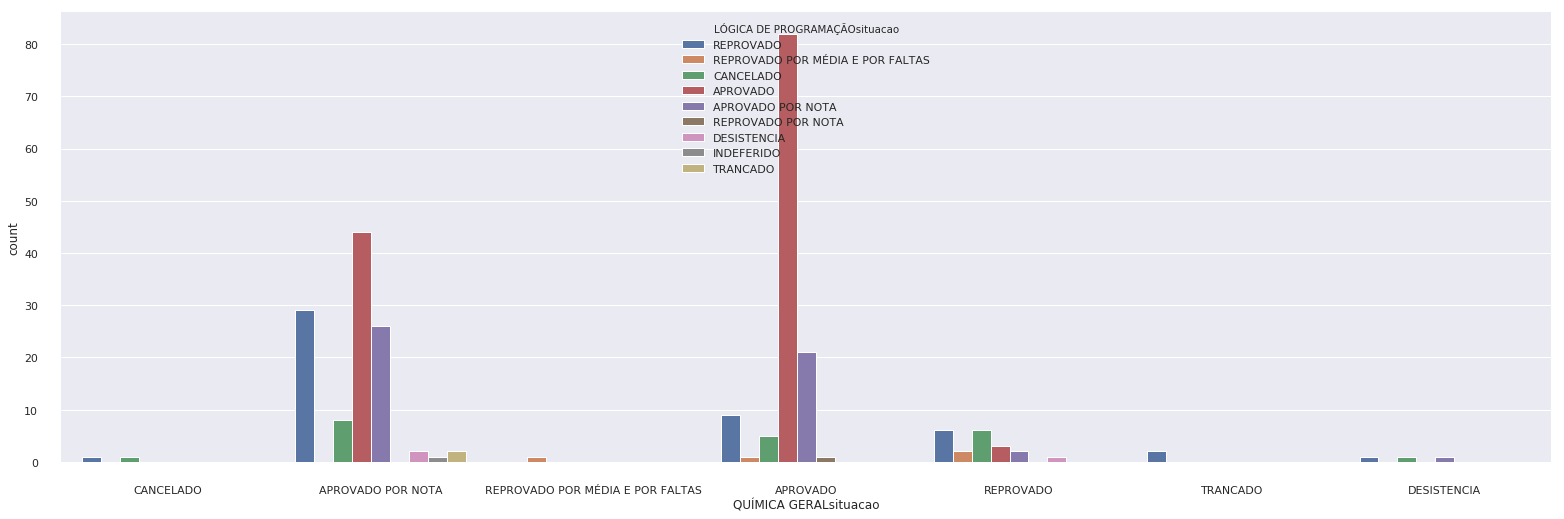

In [59]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('QUÍMICA GERALsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

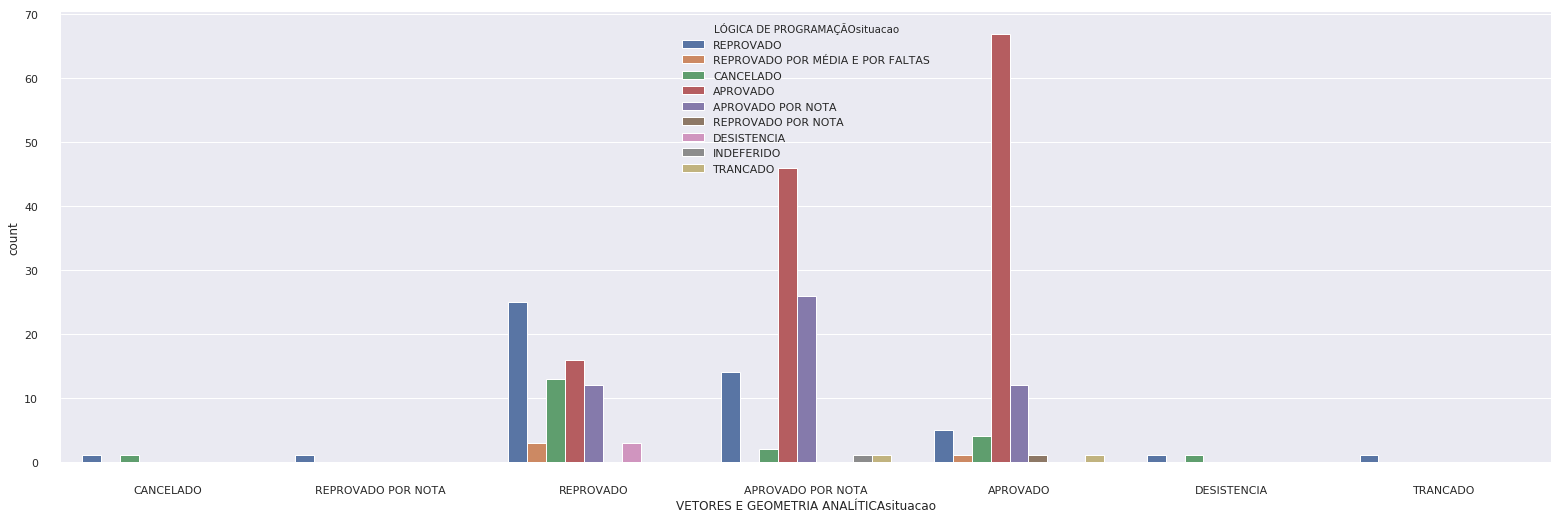

In [60]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('VETORES E GEOMETRIA ANALÍTICAsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

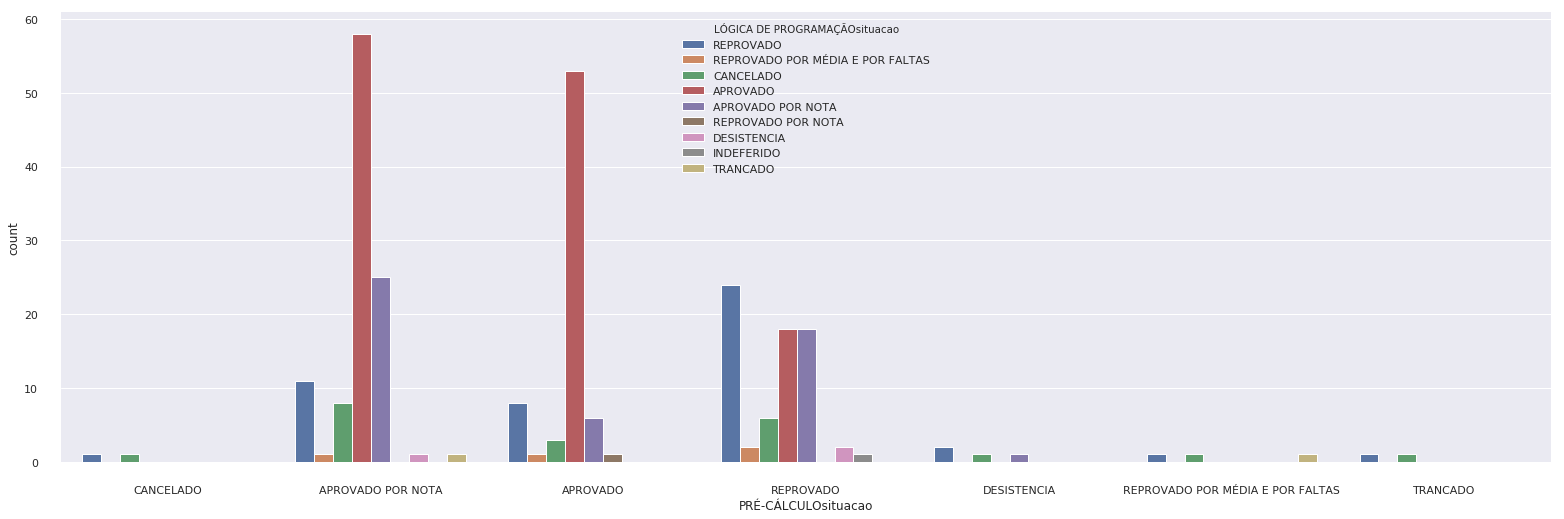

In [61]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('PRÉ-CÁLCULOsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

In [20]:
#Aplicar o algoritmo de Naive Bayes https://www.dataquest.io/blog/sci-kit-learn-tutorial/
#Escolhi só a coluna situação para fazer essa análise
datasetBayes = tabela2[["matricula",'CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao', 'PRÁTICAS DE LEITURA E ESCRITA Isituacao', 'QUÍMICA GERALsituacao', 'CÁLCULO Isituacao', 'VETORES E GEOMETRIA ANALÍTICAsituacao', 'PRÉ-CÁLCULOsituacao','LÓGICA DE PROGRAMAÇÃOsituacao' ]]
datasetBayes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 184 to 1001
Data columns (total 8 columns):
matricula                                  259 non-null int64
CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao    259 non-null object
PRÁTICAS DE LEITURA E ESCRITA Isituacao    259 non-null object
QUÍMICA GERALsituacao                      259 non-null object
CÁLCULO Isituacao                          259 non-null object
VETORES E GEOMETRIA ANALÍTICAsituacao      259 non-null object
PRÉ-CÁLCULOsituacao                        259 non-null object
LÓGICA DE PROGRAMAÇÃOsituacao              259 non-null object
dtypes: int64(1), object(7)
memory usage: 18.2+ KB


In [23]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes['CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao'] = le.fit_transform(datasetBayes['CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao'])
datasetBayes['PRÁTICAS DE LEITURA E ESCRITA Isituacao'] = le.fit_transform(datasetBayes['PRÁTICAS DE LEITURA E ESCRITA Isituacao'])
datasetBayes['VETORES E GEOMETRIA ANALÍTICAsituacao']   = le.fit_transform(datasetBayes['VETORES E GEOMETRIA ANALÍTICAsituacao'])
datasetBayes['QUÍMICA GERALsituacao']                   = le.fit_transform(datasetBayes['QUÍMICA GERALsituacao'])
datasetBayes['LÓGICA DE PROGRAMAÇÃOsituacao']           = le.fit_transform(datasetBayes['LÓGICA DE PROGRAMAÇÃOsituacao'])
datasetBayes['PRÉ-CÁLCULOsituacao']                     = le.fit_transform(datasetBayes['PRÉ-CÁLCULOsituacao'])
datasetBayes['CÁLCULO Isituacao']                       = le.fit_transform(datasetBayes['CÁLCULO Isituacao'])
#display the initial records
datasetBayes.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,matricula,"CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERALsituacao,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULOsituacao,LÓGICA DE PROGRAMAÇÃOsituacao
184,2016015699,2,2,2,2,2,2,5
319,2016097406,6,4,1,5,5,1,5
514,20160142011,4,6,5,4,4,1,6
659,20160159117,2,2,2,2,2,2,2
663,20160159180,1,1,1,4,4,1,2


In [27]:
copy = datasetBayes.drop("matricula", axis=1)
cols = copy.columns
data = copy[cols]
#retirar a coluna LÓGICA DE PROGRAMAÇÃOsituacao pq é a coluna que queremos prever
target = copy['LÓGICA DE PROGRAMAÇÃOsituacao']
data.head(n=2)

,"CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERALsituacao,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULOsituacao,LÓGICA DE PROGRAMAÇÃOsituacao
184,2,2,2,2,2,2,5
319,6,4,1,5,5,1,5


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.9487179487179487


In [32]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.9102564102564102


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8846153846153846


In [37]:
datasetBayes['LÓGICA DE PROGRAMAÇÃOsituacao'].unique()

array([5, 6, 2, 0, 1, 7, 3, 4, 8])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


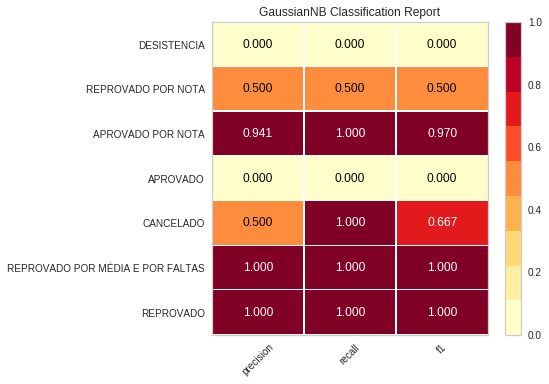

In [41]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS', 'CANCELADO','APROVADO', 'APROVADO POR NOTA', 'REPROVADO POR NOTA', 'DESISTENCIA'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [0]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS', 'CANCELADO','APROVADO', 'APROVADO POR NOTA', 'REPROVADO POR NOTA', 'DESISTENCIA'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


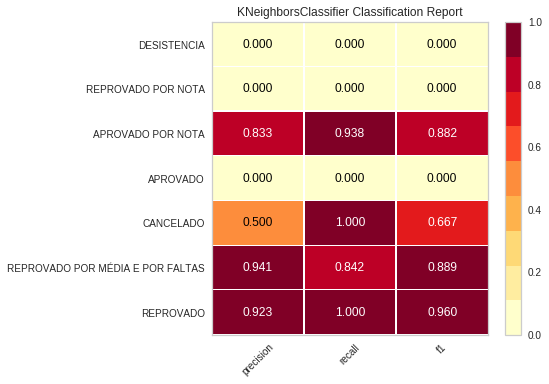

In [45]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS', 'CANCELADO','APROVADO', 'APROVADO POR NOTA', 'REPROVADO POR NOTA', 'DESISTENCIA'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data